## Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discreet/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.
i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

 Where,
 a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).

## Simple Linear Regression

Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:

$y = \beta_0 + \beta_1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $\beta_1$ is the coefficient of x
- $\beta_0$ is the intercept

$\beta_0$ and $\beta_1$ are the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :
<img src="RSquared.png" width="300">
                                              
Where RSS:  is  the Residual Sum of squares and is given as :
<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :
<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.
    <img src="TSS2.PNG">
    
The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.

We can see that R2 always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
Mathematically, it is calculated as:
                                        <img src="adjr2.PNG">
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2.
Thus, adjusted R2  will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.


### Multiple Linear Regression

In this we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient and suppose we have 3 features. In this case:

$y = \beta_0 + \beta_1 \times feature 1 + \beta_2 \times feature2 + \beta_3 \times feature3$


In [83]:
import pandas as pd
import numpy as np

In [84]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [85]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [86]:
df.carat.unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [87]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [88]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [89]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [90]:
df.depth.unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [91]:
df.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [92]:
np.where(df.x==0)

(array([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557]),)

In [93]:
np.where(df.y==0)

(array([11963, 15951, 24520, 26243, 27429, 49556, 49557]),)

In [94]:
np.where(df.z==0)

(array([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
        24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
        49557, 51506]),)

In [95]:
# x,y,z ranges are starting from 0 so, no need to convert 0 to anything

In [96]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [97]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [98]:
# we need to convert object type to numeric
obj_df = df.select_dtypes(['object'])

In [99]:
obj_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [100]:
cut_dummy = pd.get_dummies(df['cut'],drop_first=True)
cut_dummy.head()

,Good,Ideal,Premium,Very Good
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [101]:
color_dummy = pd.get_dummies(df['color'],drop_first=True)
color_dummy.head()

,E,F,G,H,I,J
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [102]:
clarity_dummy = pd.get_dummies(df['clarity'],drop_first=True)
clarity_dummy.head()

,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0


In [103]:
new_obj_df = pd.concat([cut_dummy,color_dummy,clarity_dummy],axis=1)
new_obj_df.head()

,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [104]:
num_df = df.select_dtypes(['int64','float64'])

In [105]:
num_df_X = num_df.drop(['price'],axis=1)

In [106]:
y = num_df['price']

In [107]:
num_df_X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [108]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

here we can see that there are alot diffent ranges present in dataset, so we need to normalize it.

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [110]:
scaled_df = scaler.fit_transform(num_df_X)
scaled_df = pd.DataFrame(scaled_df,columns=num_df_X.columns)

In [111]:
new_df = pd.concat([scaled_df,new_obj_df],axis=1)
new_df.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [112]:
X = new_df
X.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [113]:
type(y)

pandas.core.series.Series

In [114]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [115]:
y = pd.DataFrame(y)

In [116]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [117]:
ML_df = pd.concat([X,y],axis=1)
ML_df.head()
ML_df.to_csv('ML_df.csv',index=False)

Now our data is ready to go in Machine learning model.

In [118]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [120]:
x_train.shape

(40455, 23)

In [121]:
y_train.shape

(40455, 1)

In [122]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Residual Analysis on Training data

In [123]:
y_pred_train = lr.predict(x_train)

In [124]:
residual = y_train - y_pred_train

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

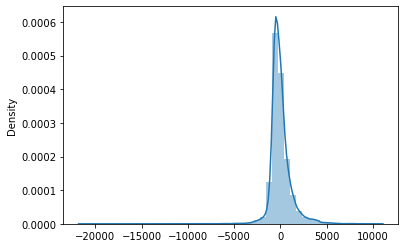

In [125]:
import seaborn as sns

sns.distplot(residual)

In [126]:
y_pred = lr.predict(x_test)
y_pred

array([[1907.53009172],
       [2203.89364785],
       [-374.64185419],
       ...,
       [7415.10079133],
       [-613.96581654],
       [2528.02370006]])

In [127]:
from sklearn.metrics import r2_score
lr.score(x_train,y_train)

0.9207362358479119

In [128]:
lr.score(x_test,y_test)

0.916918338230024

In [129]:
r2_score(y_test,y_pred)

0.916918338230024

In [130]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(((1-r2)*(n-1))/(n-p-1))
    return adjusted_r2

In [131]:
print(adj_r2(x_test,y_test))

0.9167763815982203


#### Residual analysis for test data

In [132]:
residual = y_test -y_pred
type(y_pred)

numpy.ndarray

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

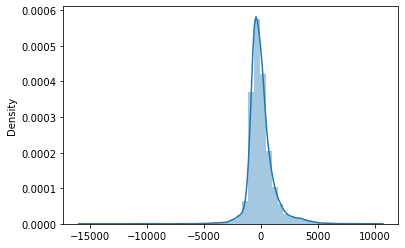

In [133]:
sns.distplot(residual)

#### Regularization


In [134]:
lassocv = LassoCV(alphas=None,cv=5,max_iter=100000,normalize=True)

In [135]:
lassocv.fit(x_train,y_train)

/home/ronak/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=5, max_iter=100000, normalize=True)

In [136]:
alpha = lassocv.alpha_
alpha

0.01826988074914973

In [137]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.01826988074914973)

In [138]:
lasso_reg.score(x_train,y_train)

0.9207361380366791

In [139]:
lasso_reg.score(x_test,y_test)

0.9169138855520258

#### hyperparameter tuning

In [98]:
param_grid = {
    'alpha':[0.01,0.05,0.1,0.5,1],
    'max_iter':[100,1000,10000,100000],
    'tol':[0.0001,0.001,0.01],
    'selection':['cyclic','random']
}rsidual = y_train - 

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
lr_random_cv = RandomizedSearchCV(estimator=lasso_reg,param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1,random_state=33)
lr_random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.01826988074914973), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.5, 1],
                                        'max_iter': [100, 1000, 10000, 100000],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=33, verbose=2)

In [104]:
lr_random_cv.best_params_


{'tol': 0.01, 'selection': 'random', 'max_iter': 1000, 'alpha': 0.1}

In [106]:
best_random_grid = lr_random_cv.best_estimator_
best_random_grid

Lasso(alpha=0.1, selection='random', tol=0.01)

In [107]:
y_pred = best_random_grid.predict(x_test)
y_pred

array([1908.99359617, 2204.47548209, -375.16421963, ..., 7415.21339524,
       -618.22357029, 2528.75655211])

In [108]:
lr_random_cv.score(x_train,y_train)

0.9207317425944941

In [109]:
lr_random_cv.score(x_test,y_test)

0.9168843917219526